In [24]:
import seaborn as sns

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [26]:
df=sns.load_dataset('titanic')

In [27]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [28]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [29]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [30]:
df.dropna(subset=['age'], axis=0,inplace=True)

In [31]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

In [32]:
df=df[["sex","age","fare"]]

In [33]:
df.head()

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


# Normality test

<Axes: xlabel='age', ylabel='Count'>

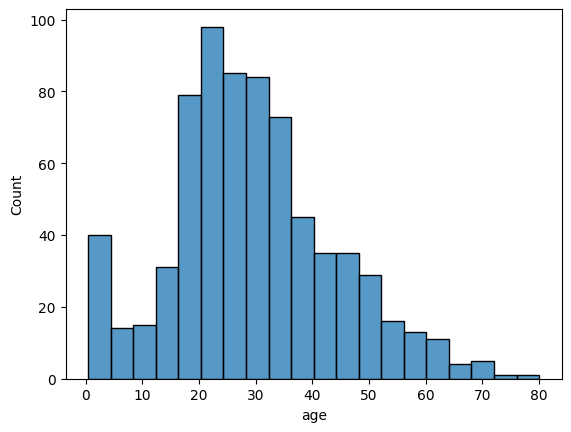

In [34]:
sns.histplot(df['age'])

# T test

A t-test is a statistical test used to compare the means of two groups and determine if they are significantly different from each other. It is a parametric test that is widely used in hypothesis testing when the data are approximately normally distributed.
There are several variations of the t-test, and the choice of which one to use depends on the characteristics of the data and the specific research question


In [35]:
from scipy.stats import ttest_ind

In [36]:
male=df[df["sex"]=="male"]

In [37]:
female=df[df["sex"]=="female"]

In [38]:
male.head()

,sex,age,fare
0,male,22.0,7.2500
4,male,35.0,8.0500
6,male,54.0,51.8625
7,male,2.0,21.0750
12,male,20.0,8.0500


In [39]:
female.head()

,sex,age,fare
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
8,female,27.0,11.1333
9,female,14.0,30.0708


In [40]:
state, p_value=ttest_ind(male["age"], female["age"])

In [41]:
print("state=",state,"p_value=",p_value)

state= 2.499206354920835 p_value= 0.012671296797013709


In [42]:
if p_value> 0.05:
    print("There is no significance difference")
else:
    print("There is significance difference")

There is significance difference


**One sample t test**

A one-sample t-test is a statistical test used to determine whether the mean of a single sample is significantly different from a known or hypothesized population mean. It is a parametric test commonly employed when the data are approximately normally distributed.
Hypotheses in a One-Sample T-Test:
**Null Hypothesis (H0​):** The population mean (μ) is equal to a specified value.
**Alternative Hypothesis (H1​):** The population mean (μ) is not equal to the specified value.


In [43]:
from scipy.stats import ttest_1samp

state, p_value=ttest_1samp(df["fare"], 32.7)
print("state=",state,"p_value=",p_value)
if p_value> 0.05:
    print("There is no significance difference")
else:
    print("There is significance difference")

state= 1.0071059132102707 p_value= 0.3142255322338007
There is no significance difference
